## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [8]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
SBO=[True,False]

In [14]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

results = {}
for sbo in SBO:
    model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                                 monitor="val_loss", 
                                 save_best_only=sbo)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    tag = "save_best_only-%s" % str(sbo)
    # Load back
    model = keras.models.load_model("./tmp.h5")
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    results[tag] = {'train-loss': train_loss,'valid-loss': valid_loss,
                    'train-acc': train_acc,'valid-acc': valid_acc,
                    'acc_loadback':acc_loadback,'loss_loadback':loss_loadback}

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512 

50000/50000 [==============================] - 2s 30us/step - loss: 0.5709 - accuracy: 0.8329 - val_loss: 1.6159 - val_accuracy: 0.4893
Epoch 47/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.5551 - accuracy: 0.8378 - val_loss: 1.6274 - val_accuracy: 0.4901
Epoch 48/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.5399 - accuracy: 0.8440 - val_loss: 1.6406 - val_accuracy: 0.4906
Epoch 49/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.5219 - accuracy: 0.8507 - val_loss: 1.6608 - val_accuracy: 0.4880
Epoch 50/50
10000/10000 [==============================] - 1s 80us/step
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_

50000/50000 [==============================] - 2s 30us/step - loss: 0.6490 - accuracy: 0.8020 - val_loss: 1.5651 - val_accuracy: 0.4974
Epoch 42/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.6306 - accuracy: 0.8089 - val_loss: 1.5927 - val_accuracy: 0.4906
Epoch 43/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.6118 - accuracy: 0.8159 - val_loss: 1.5999 - val_accuracy: 0.4932
Epoch 44/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.5946 - accuracy: 0.8234 - val_loss: 1.6263 - val_accuracy: 0.4891
Epoch 45/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.5787 - accuracy: 0.8292 - val_loss: 1.6318 - val_accuracy: 0.4930
Epoch 46/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.5605 - accuracy: 0.8362 - val_loss: 1.6385 - val_accuracy: 0.4923
Epoch 47/50
50000/50000 [==============================] - 2s 30us/step - loss: 0.5443 - accuracy: 0.8434 - val_loss: 1.6537

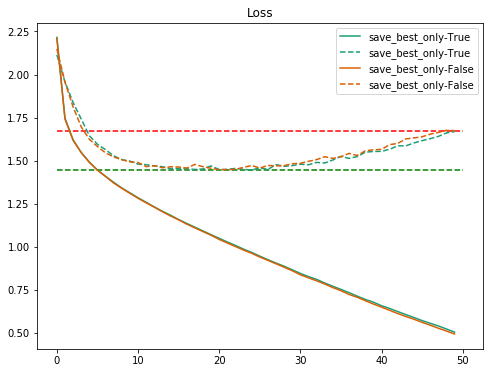

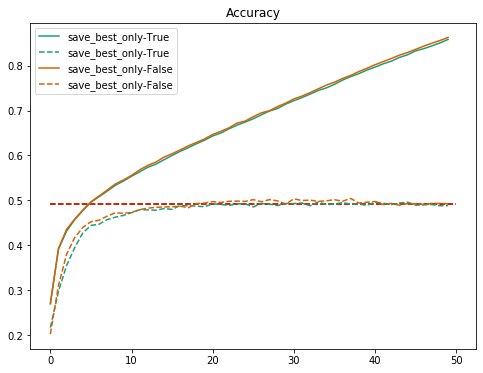

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('Dark2')
color_bar = [cm(0),cm(1)]
color_hlines = ['g','r']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=results[cond]['loss_loadback'], xmin=0, xmax=len(results[cond]['train-loss']),
               colors=color_hlines[i], linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=results[cond]['acc_loadback'], xmin=0, xmax=len(results[cond]['train-acc']),
               colors=color_hlines[i], linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()